<a href="https://colab.research.google.com/github/shubham9875/EDAProjectFinal/blob/main/EDAProjectFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [181]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [182]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [183]:
pf=pd.read_csv("/content/drive/MyDrive/eda proj/train 2.csv")

In [184]:
pf.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [185]:
pf.shape

(550068, 12)

In [186]:
pf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [187]:
pf.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [188]:
pf.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [189]:
# pf.rename(columns={'User_ID':'u_id','Product_ID':'p_id','Gender':'gender', 'Age':'age','Occupation':'occupation',
#                     'City_Category':'city_category','Stay_In_Current_City_Years':'years', 'Marital_Status':'marital',
#                      'Product_Category_1': 'product1','Product_Category_2':'product2', 'Product_Category_3':'product3',
#                      'Purchase':'purchase'},inplace = True)


In [190]:
pf.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [191]:
pf.duplicated().sum()

0

In [192]:
category = pf.loc[:,['Product_Category_1', 'Product_Category_2', 'Product_Category_3']]
category.describe()

,Product_Category_1,Product_Category_2,Product_Category_3
count,550068.000000,376430.000000,166821.000000
mean,5.404270,9.842329,12.668243
std,3.936211,5.086590,4.125338
min,1.000000,2.000000,3.000000
25%,1.000000,5.000000,9.000000
50%,5.000000,9.000000,14.000000
75%,8.000000,15.000000,16.000000
max,20.000000,18.000000,18.000000


In [193]:
# Droping user id

In [194]:
# Here we are dropping product_id column as there is no need of that columns in data 
pf.drop(['User_ID'],inplace = True, axis = 'columns')
pf.drop(['Product_ID'],inplace = True, axis = 'columns')

In [195]:
pf.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [196]:
# we dont need + in 4+ years in city column
# so we will remove them 

pf['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [197]:
def cities(value):
    if '+' in value:
        value = value.replace('+','')
        return int(value)
    else:
        return int(value)

pf['Stay_In_Current_City_Years'] = pf['Stay_In_Current_City_Years'].apply(cities)

In [198]:
pf['Stay_In_Current_City_Years'].dtype

dtype('int64')

In [199]:
pf['Stay_In_Current_City_Years'].unique()

array([2, 4, 3, 1, 0])

In [200]:
#genders
pf['Gender'].unique()

array(['F', 'M'], dtype=object)

In [201]:
pf['Gender'].dtype

dtype('O')

In [202]:
# Age
pf['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [203]:
pf.head(3)

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,F,0-17,10,A,2,0,12,NaN,NaN,1422


In [204]:
# As age is present in range so now we convert the range into particular name like

# 0-17 -> child
# 18-25 -> teen
# 26-35 -> young adult
# 36-45 -> mid adult
# 46-50 -> old adult
# 51-55 -> early old
# 55+ -> old


pf['Age'] = pf['Age'].map({'0-17': 'Child', '18-25': 'Teen', '26-35': 'Young Adult', '36-45': 'Mid Adult', 
                           '46-50': 'Old Adult', '51-55': 'Early Old', '55+': 'Old'})
        

In [205]:
pf.head(10)

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,F,Child,10,A,2,0,3,NaN,NaN,8370
1,F,Child,10,A,2,0,1,6.0,14.0,15200
2,F,Child,10,A,2,0,12,NaN,NaN,1422
3,F,Child,10,A,2,0,12,14.0,NaN,1057
4,M,Old,16,C,4,0,8,NaN,NaN,7969
5,M,Young Adult,15,A,3,0,1,2.0,NaN,15227
6,M,Old Adult,7,B,2,1,1,8.0,17.0,19215
7,M,Old Adult,7,B,2,1,1,15.0,NaN,15854
8,M,Old Adult,7,B,2,1,1,16.0,NaN,15686
9,M,Young Adult,20,A,1,1,8,NaN,NaN,7871


In [206]:
pf['Age'].unique()

array(['Child', 'Old', 'Young Adult', 'Old Adult', 'Early Old',
       'Mid Adult', 'Teen'], dtype=object)

In [207]:
pf.isnull().sum()

Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [208]:
#replacing null values in product 2
pf['Product_Category_2']=pf['Product_Category_2'].fillna(pf['Product_Category_2'].mode()[0])


In [209]:
#replacing null values in product 3
pf['Product_Category_3']=pf['Product_Category_3'].fillna(pf['Product_Category_3'].mode()[0])


In [210]:
pf.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,F,Child,10,A,2,0,3,8.0,16.0,8370
1,F,Child,10,A,2,0,1,6.0,14.0,15200
2,F,Child,10,A,2,0,12,8.0,16.0,1422
3,F,Child,10,A,2,0,12,14.0,16.0,1057
4,M,Old,16,C,4,0,8,8.0,16.0,7969


In [211]:
# Visualization


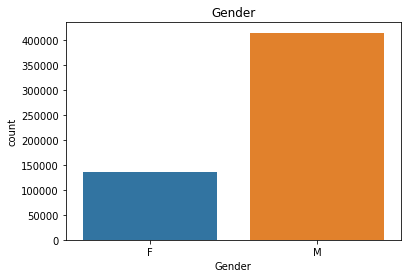

In [212]:
plt.title("Gender")
sns.countplot(x = 'Gender', data = pf)

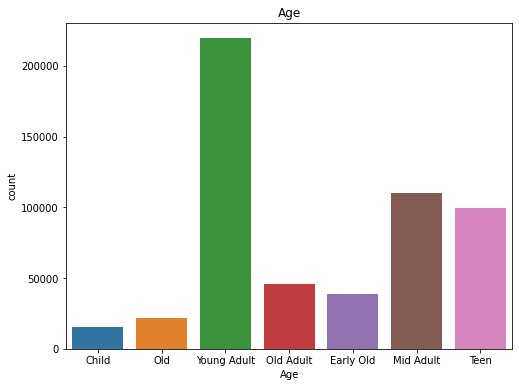

In [213]:
plt.figure(figsize = (8,6),)
plt.title("Age")
sns.countplot(x = 'Age', data = pf)

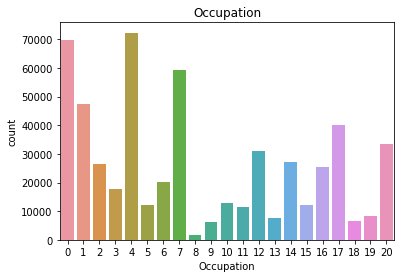

In [224]:
plt.title("Occupation")
sns.countplot(x = 'Occupation', data = pf)

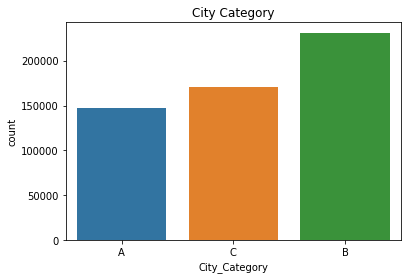

In [214]:

plt.title("City Category")
sns.countplot(x = 'City_Category', data = pf)

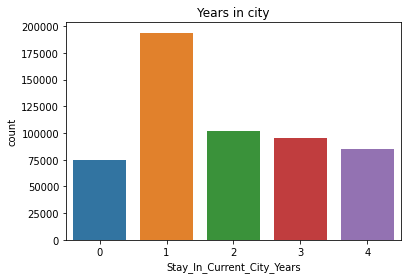

In [215]:
plt.title("Years in city")
sns.countplot(x = 'Stay_In_Current_City_Years', data = pf)

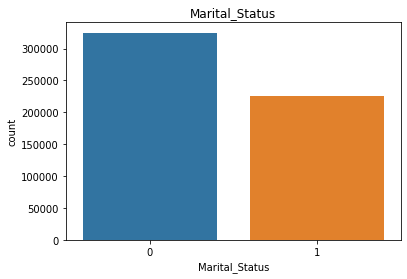

In [216]:
plt.title("Marital_Status")
sns.countplot(x = 'Marital_Status', data = pf)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


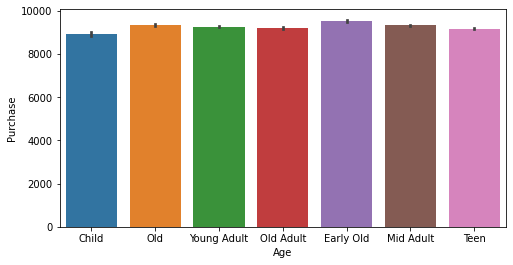

In [217]:
plt.figure(figsize=(8,4))
sns.barplot('Age','Purchase',data=pf)
# plt.xticks(rotation=45)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


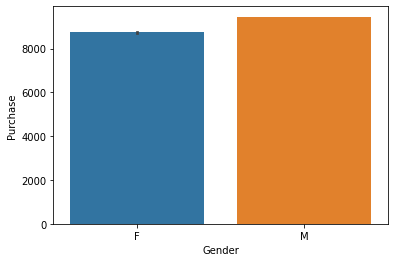

In [218]:
plt.figure(figsize=(6,4))
sns.barplot('Gender','Purchase',data=pf)

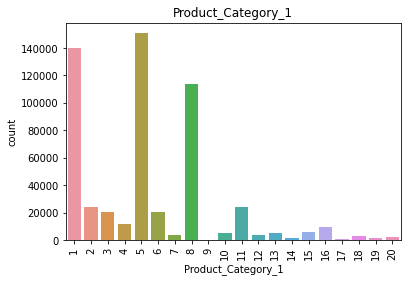

In [219]:


plt.title('Product_Category_1')
sns.countplot(x='Product_Category_1',data=pf)
plt.xticks(rotation=90)

plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text major ticklabel objects>)

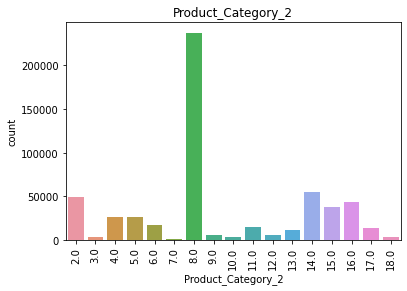

In [220]:
plt.title('Product_Category_2')
sns.countplot(x='Product_Category_2',data=pf)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text major ticklabel objects>)

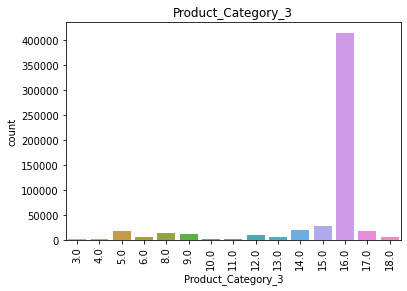

In [221]:
plt.title('Product_Category_3')
sns.countplot(x='Product_Category_3',data=pf)
plt.xticks(rotation=90)

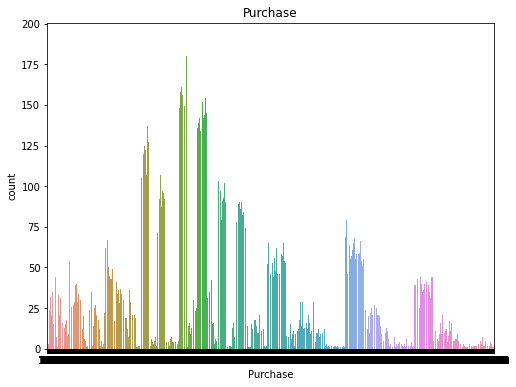

In [222]:
plt.figure(figsize=(8,6))
plt.title("Purchase")
sns.countplot(x = 'Purchase', data = pf)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

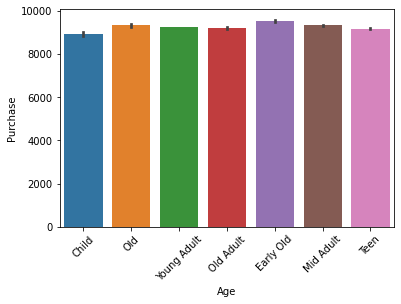

In [231]:
#Bivariate analysis
plt.figure(figsize=(6,4))
sns.barplot('Age','Purchase',data=pf)
plt.xticks(rotation=45)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text major ticklabel objects>)

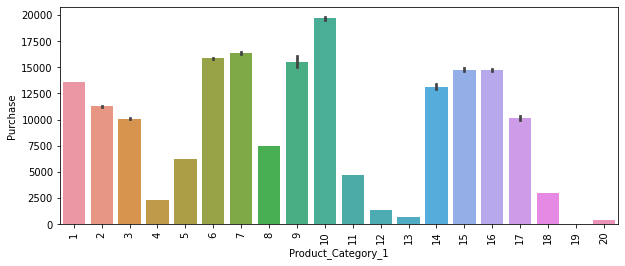

In [228]:
plt.figure(figsize=(10,4))
sns.barplot('Product_Category_1','Purchase',data=pf)
plt.xticks(rotation=90)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text major ticklabel objects>)

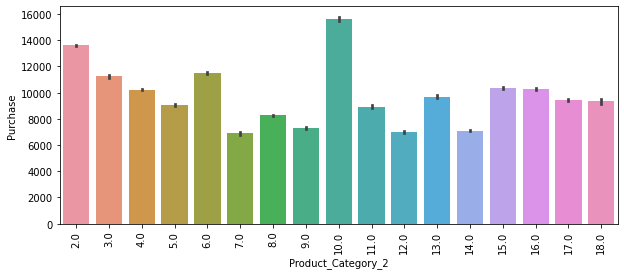

In [229]:
plt.figure(figsize=(10,4))
sns.barplot('Product_Category_2','Purchase',data=pf)
plt.xticks(rotation=90)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text major ticklabel objects>)

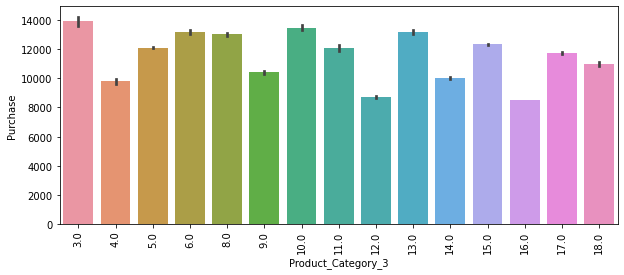

In [230]:
plt.figure(figsize=(10,4))
sns.barplot('Product_Category_3','Purchase',data=pf)
plt.xticks(rotation=90)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([0, 1]), <a list of 2 Text major ticklabel objects>)

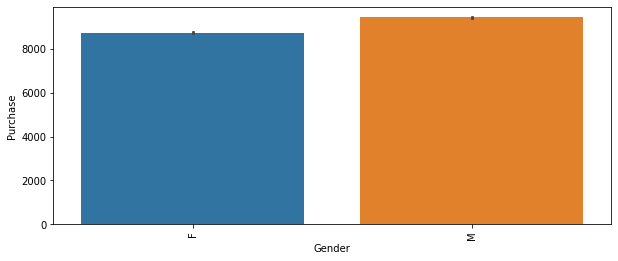

In [232]:
plt.figure(figsize=(10,4))
sns.barplot('Gender','Purchase',data=pf)
plt.xticks(rotation=90)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


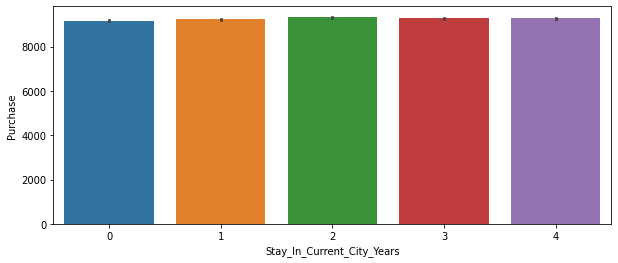

In [235]:
plt.figure(figsize=(10,4))
sns.barplot('Stay_In_Current_City_Years','Purchase',data=pf)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


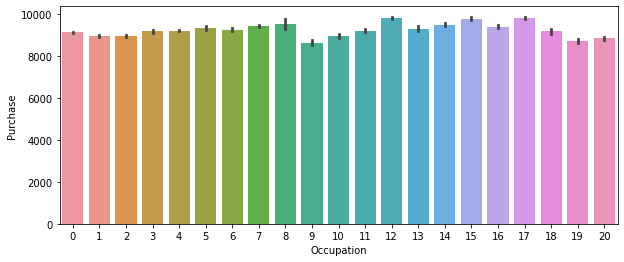

In [236]:
plt.figure(figsize=(10,4))
sns.barplot('Occupation','Purchase',data=pf)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


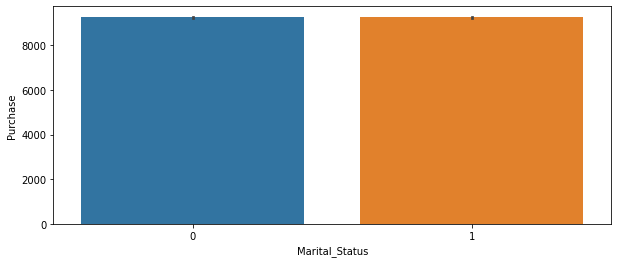

In [237]:
plt.figure(figsize=(10,4))
sns.barplot('Marital_Status','Purchase',data=pf)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


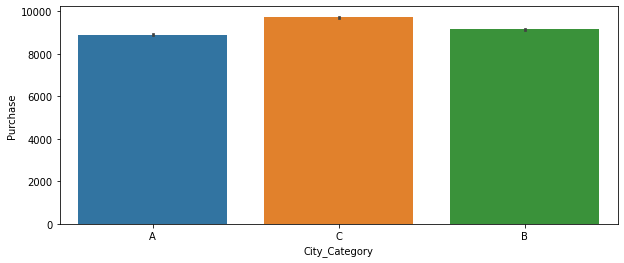

In [240]:
plt.figure(figsize=(10,4))
sns.barplot('City_Category','Purchase',data=pf)